In [1]:
import scanpy as sc
import pandas as pd
from pathlib import Path
import anndata as ad
import numpy as np
import os

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

DPI = 300
FONTSIZE = 20  # 42

sc.settings.set_figure_params(
    scanpy=True, dpi=100, transparent=True, vector_friendly=True, dpi_save=DPI
)
from matplotlib import rcParams

rcParams["pdf.fonttype"] = 42

In [2]:
DIR2SAVE = Path("/data/BCI-CRC/nasrine/data/CRC/Metastatic_CRC_LM_dataset/subpopulations/TNKILC/final/")
DIR2SAVE.mkdir(parents=True, exist_ok=True)

FIG2SAVE = DIR2SAVE.joinpath("figures/forpaper/")
FIG2SAVE.mkdir(parents=True, exist_ok=True)
# set the global variable: sc.settings.figdir to save all plots
sc.settings.figdir = FIG2SAVE

In [3]:
adata = sc.read_h5ad(DIR2SAVE.joinpath("CRC_LM_decon_scvi_hvg_TNKILC_NK_clustering_final.h5ad"))
adata.shape

(75489, 2000)

In [4]:
adata.obs.Annotation_scVI_detailed.cat.categories

Index(['CD4 Tfh', 'CD4 Th', 'CD4 Th HSP', 'CD4 Th17', 'CD4 Tn', 'CD8 Tem',
       'CD8 Tem GZMB', 'CD8 Tem HSP', 'CD8 Tex', 'MAIT', 'NK1', 'NK2', 'NKT',
       'T cycling', 'Treg', 'gdT'],
      dtype='object')

In [5]:
adata.uns["Annotation_scVI_detailed_colors"]

array(['#1f78b4', '#fa9fb5', '#beaed4', '#fdbf6f', '#b15928', '#e31a1c',
       '#fc9272', '#800026', '#ff7f00', '#7fc97f', '#1d91c0', '#dd3497',
       '#a6cee3', '#ffff99', '#33a02c', '#6a3d9a'], dtype=object)

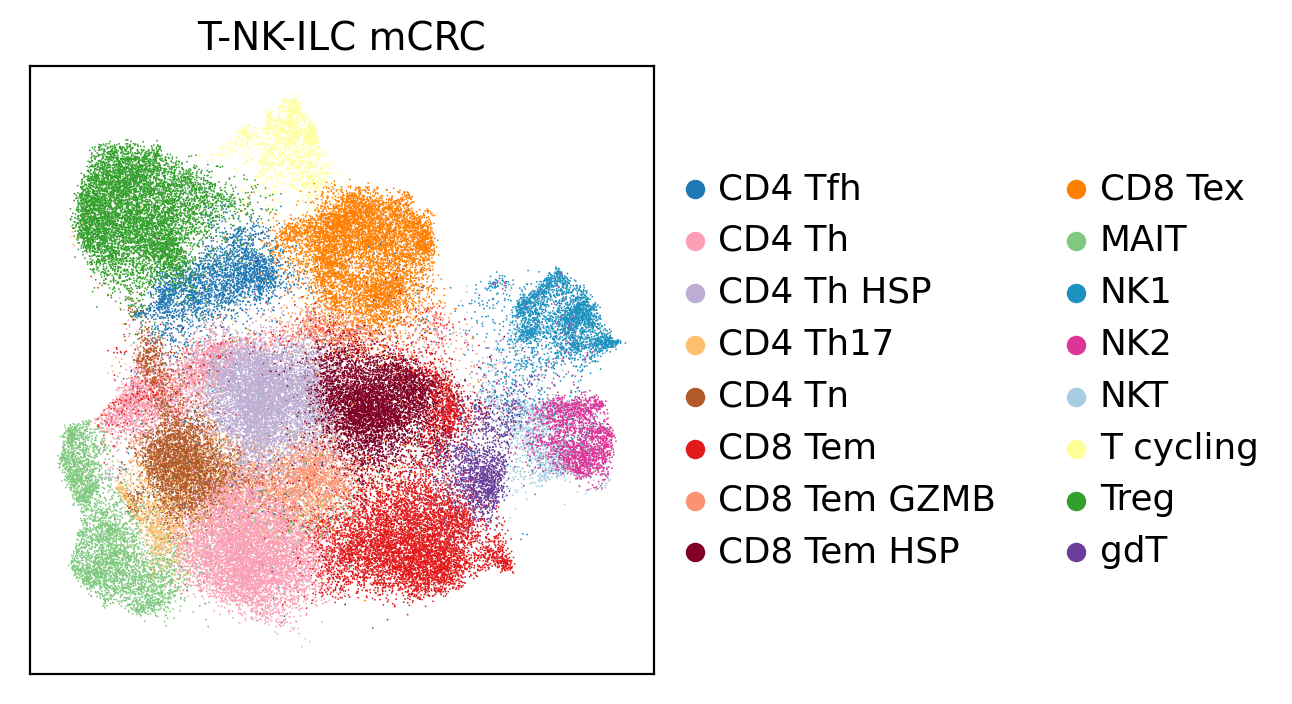

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1)
sc.pl.umap(
    adata,
    color="Annotation_scVI_detailed",
    show=False,
    legend_loc="right margin",
    title="T-NK-ILC mCRC",
    ax=ax,
)
ax.set_xlabel("")
ax.set_ylabel("")
fig.savefig(FIG2SAVE.joinpath("Annotation.pdf"), bbox_inches='tight', dpi=DPI)

### proportions across datasetts

In [4]:
from matplotlib.patches import Rectangle


def proportion_cells_patient(
    adata, groupby_labels, xlabel: str, ylabel: str, colors: dict, figname: str, bbox_to_anchor=(1, 0.8)
):  # colors
    # compute proportion of cells within each group
    table2plot = (
        adata.reset_index()
        .groupby(groupby_labels)
        .size()
        .groupby(level=0)
        .apply(lambda x: x * 100 / x.sum())
        .unstack()
    )

    fig, ax = plt.subplots(
        nrows=1,
        ncols=1,
        sharey=False,
        sharex=False,
        dpi=DPI,
    )  # figsize=(4, 4))

    print(table2plot)
    table2plot.plot.barh(stacked=True, ax=ax, color=colors.values())  # , color=colors
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.grid(False, which="major", axis="both")  # removes major horizontal gridlinesd

    labels = list(colors.keys())
    l = [Rectangle((0, 0), 0, 0, color=color) for color in list(colors.values())]
    ax.legend(
        l,
        labels,
        loc="upper left",
        bbox_to_anchor=bbox_to_anchor, #(1, 0.8),
        facecolor="white",
        edgecolor="white",
        ncol=1,
        borderaxespad=0.0,
        framealpha=0,
        frameon=False,
    )

    plt.savefig(FIG2SAVE.joinpath(figname), dpi=DPI, format="pdf", bbox_inches="tight")
    plt.show()

cell_source               BCI-Nuclei  Che-Cells   Wu-Cells
Annotation_scVI_detailed                                  
CD4 Tfh                     4.485050  58.870432  36.644518
CD4 Th                      3.961259  46.799031  49.239709
CD4 Th HSP                  0.013801  48.868341  51.117858
CD4 Th17                    1.497161  15.952504  82.550336
CD4 Tn                      0.711595  46.735036  52.553370
CD8 Tem                     3.869630  30.692157  65.438213
CD8 Tem GZMB                4.955644  44.478434  50.565922
CD8 Tem HSP                 0.194238  70.686306  29.119456
CD8 Tex                     1.659806  69.313504  29.026690
MAIT                        0.380910  10.194936  89.424154
NK1                         0.440529  14.977974  84.581498
NK2                         0.430849  35.200345  64.368807
NKT                         1.014493  46.159420  52.826087
T cycling                   2.874859  93.630214   3.494927
Treg                        2.560418  63.082952  34.3566

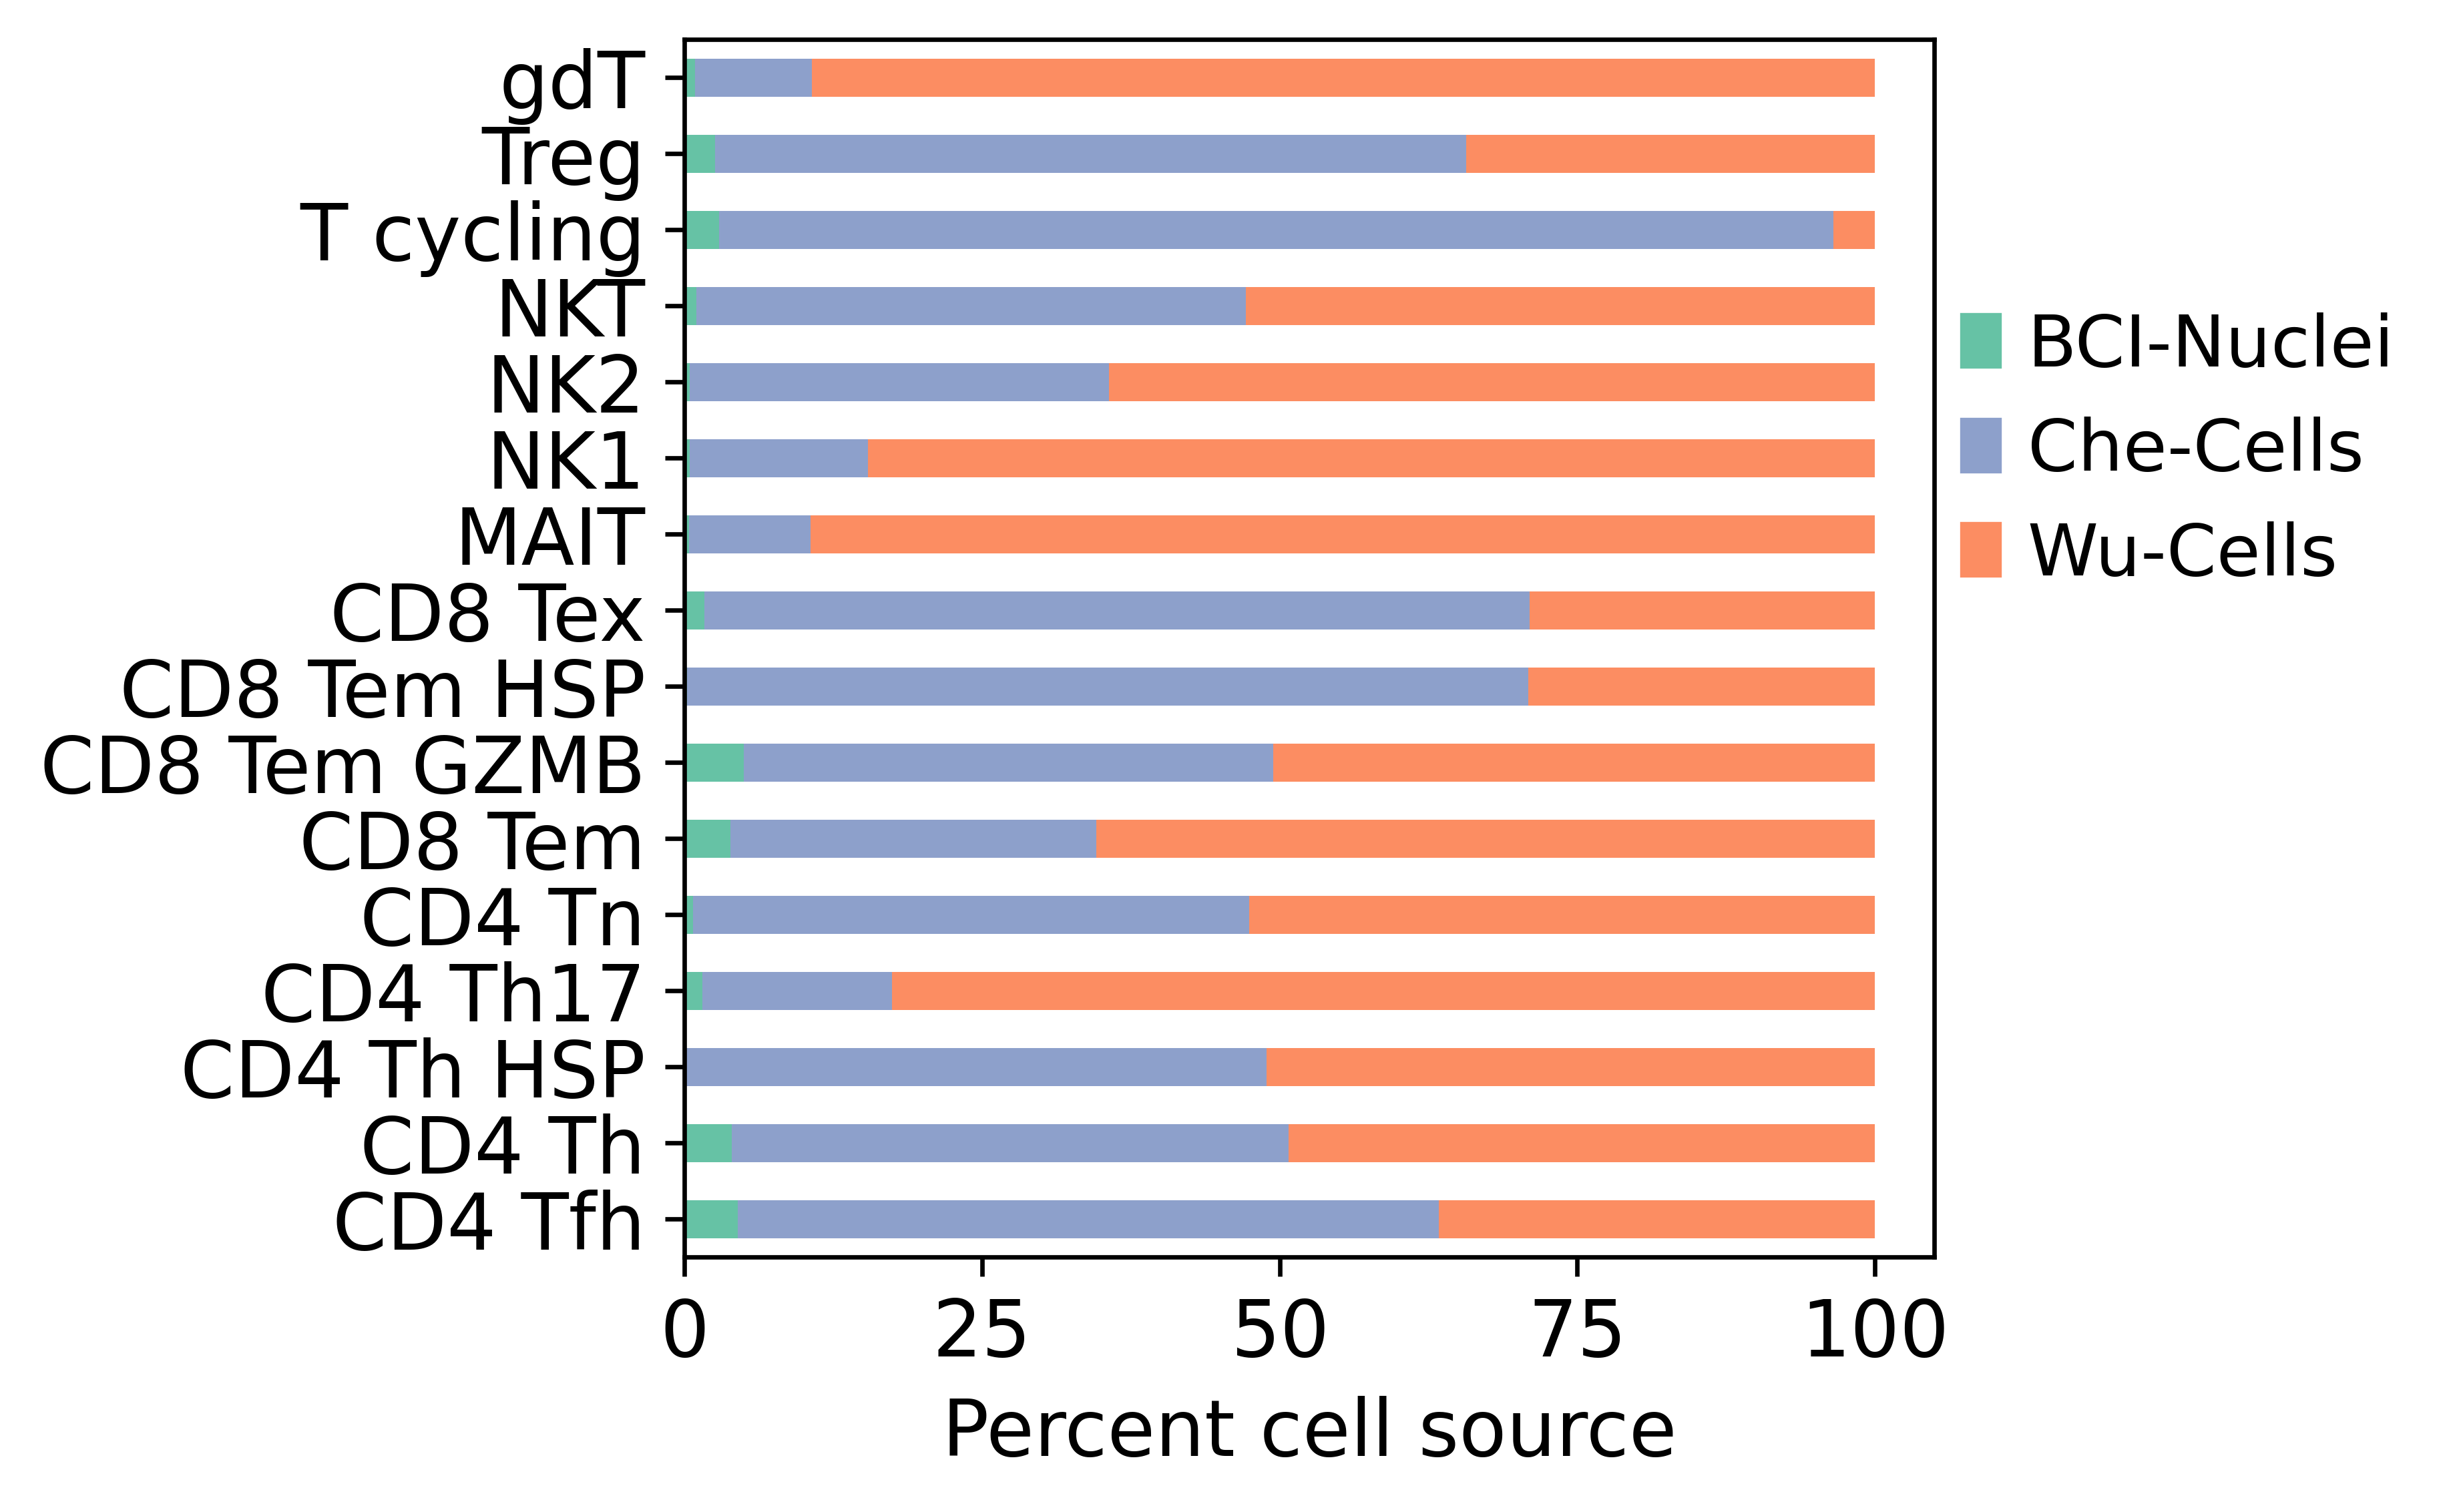

In [8]:
from collections import OrderedDict

color_dict = OrderedDict(
    zip(
        adata.obs["cell_source"].cat.categories.values.tolist(),
        adata.uns["cell_source_colors"],
    )
)

proportion_cells_patient(
    adata.obs,
    groupby_labels=["Annotation_scVI_detailed", "cell_source"],
    xlabel="Percent cell source",
    ylabel="",
    colors=color_dict,
    figname="annotation_cell_source.pdf",
)

Annotation_scVI_detailed   CD4 Tfh     CD4 Th  CD4 Th HSP  CD4 Th17    CD4 Tn  \
cell_source                                                                     
BCI-Nuclei                8.653846  26.217949    0.064103  1.858974  2.179487   
Che-Cells                 4.999859  13.633927    9.991253  0.871872  6.300612   
Wu-Cells                  2.865828  13.209312    9.623779  4.154542  6.524111   

Annotation_scVI_detailed    CD8 Tem  CD8 Tem GZMB  CD8 Tem HSP    CD8 Tex  \
cell_source                                                                 
BCI-Nuclei                21.538462     10.384615     0.769231   8.012821   
Che-Cells                  7.519540      4.102593    12.321887  14.728704   
Wu-Cells                  14.763043      4.294845     4.674184   5.679692   

Annotation_scVI_detailed       MAIT       NK1       NK2       NKT  T cycling  \
cell_source                                                                    
BCI-Nuclei                 1.089744  0.897436  0

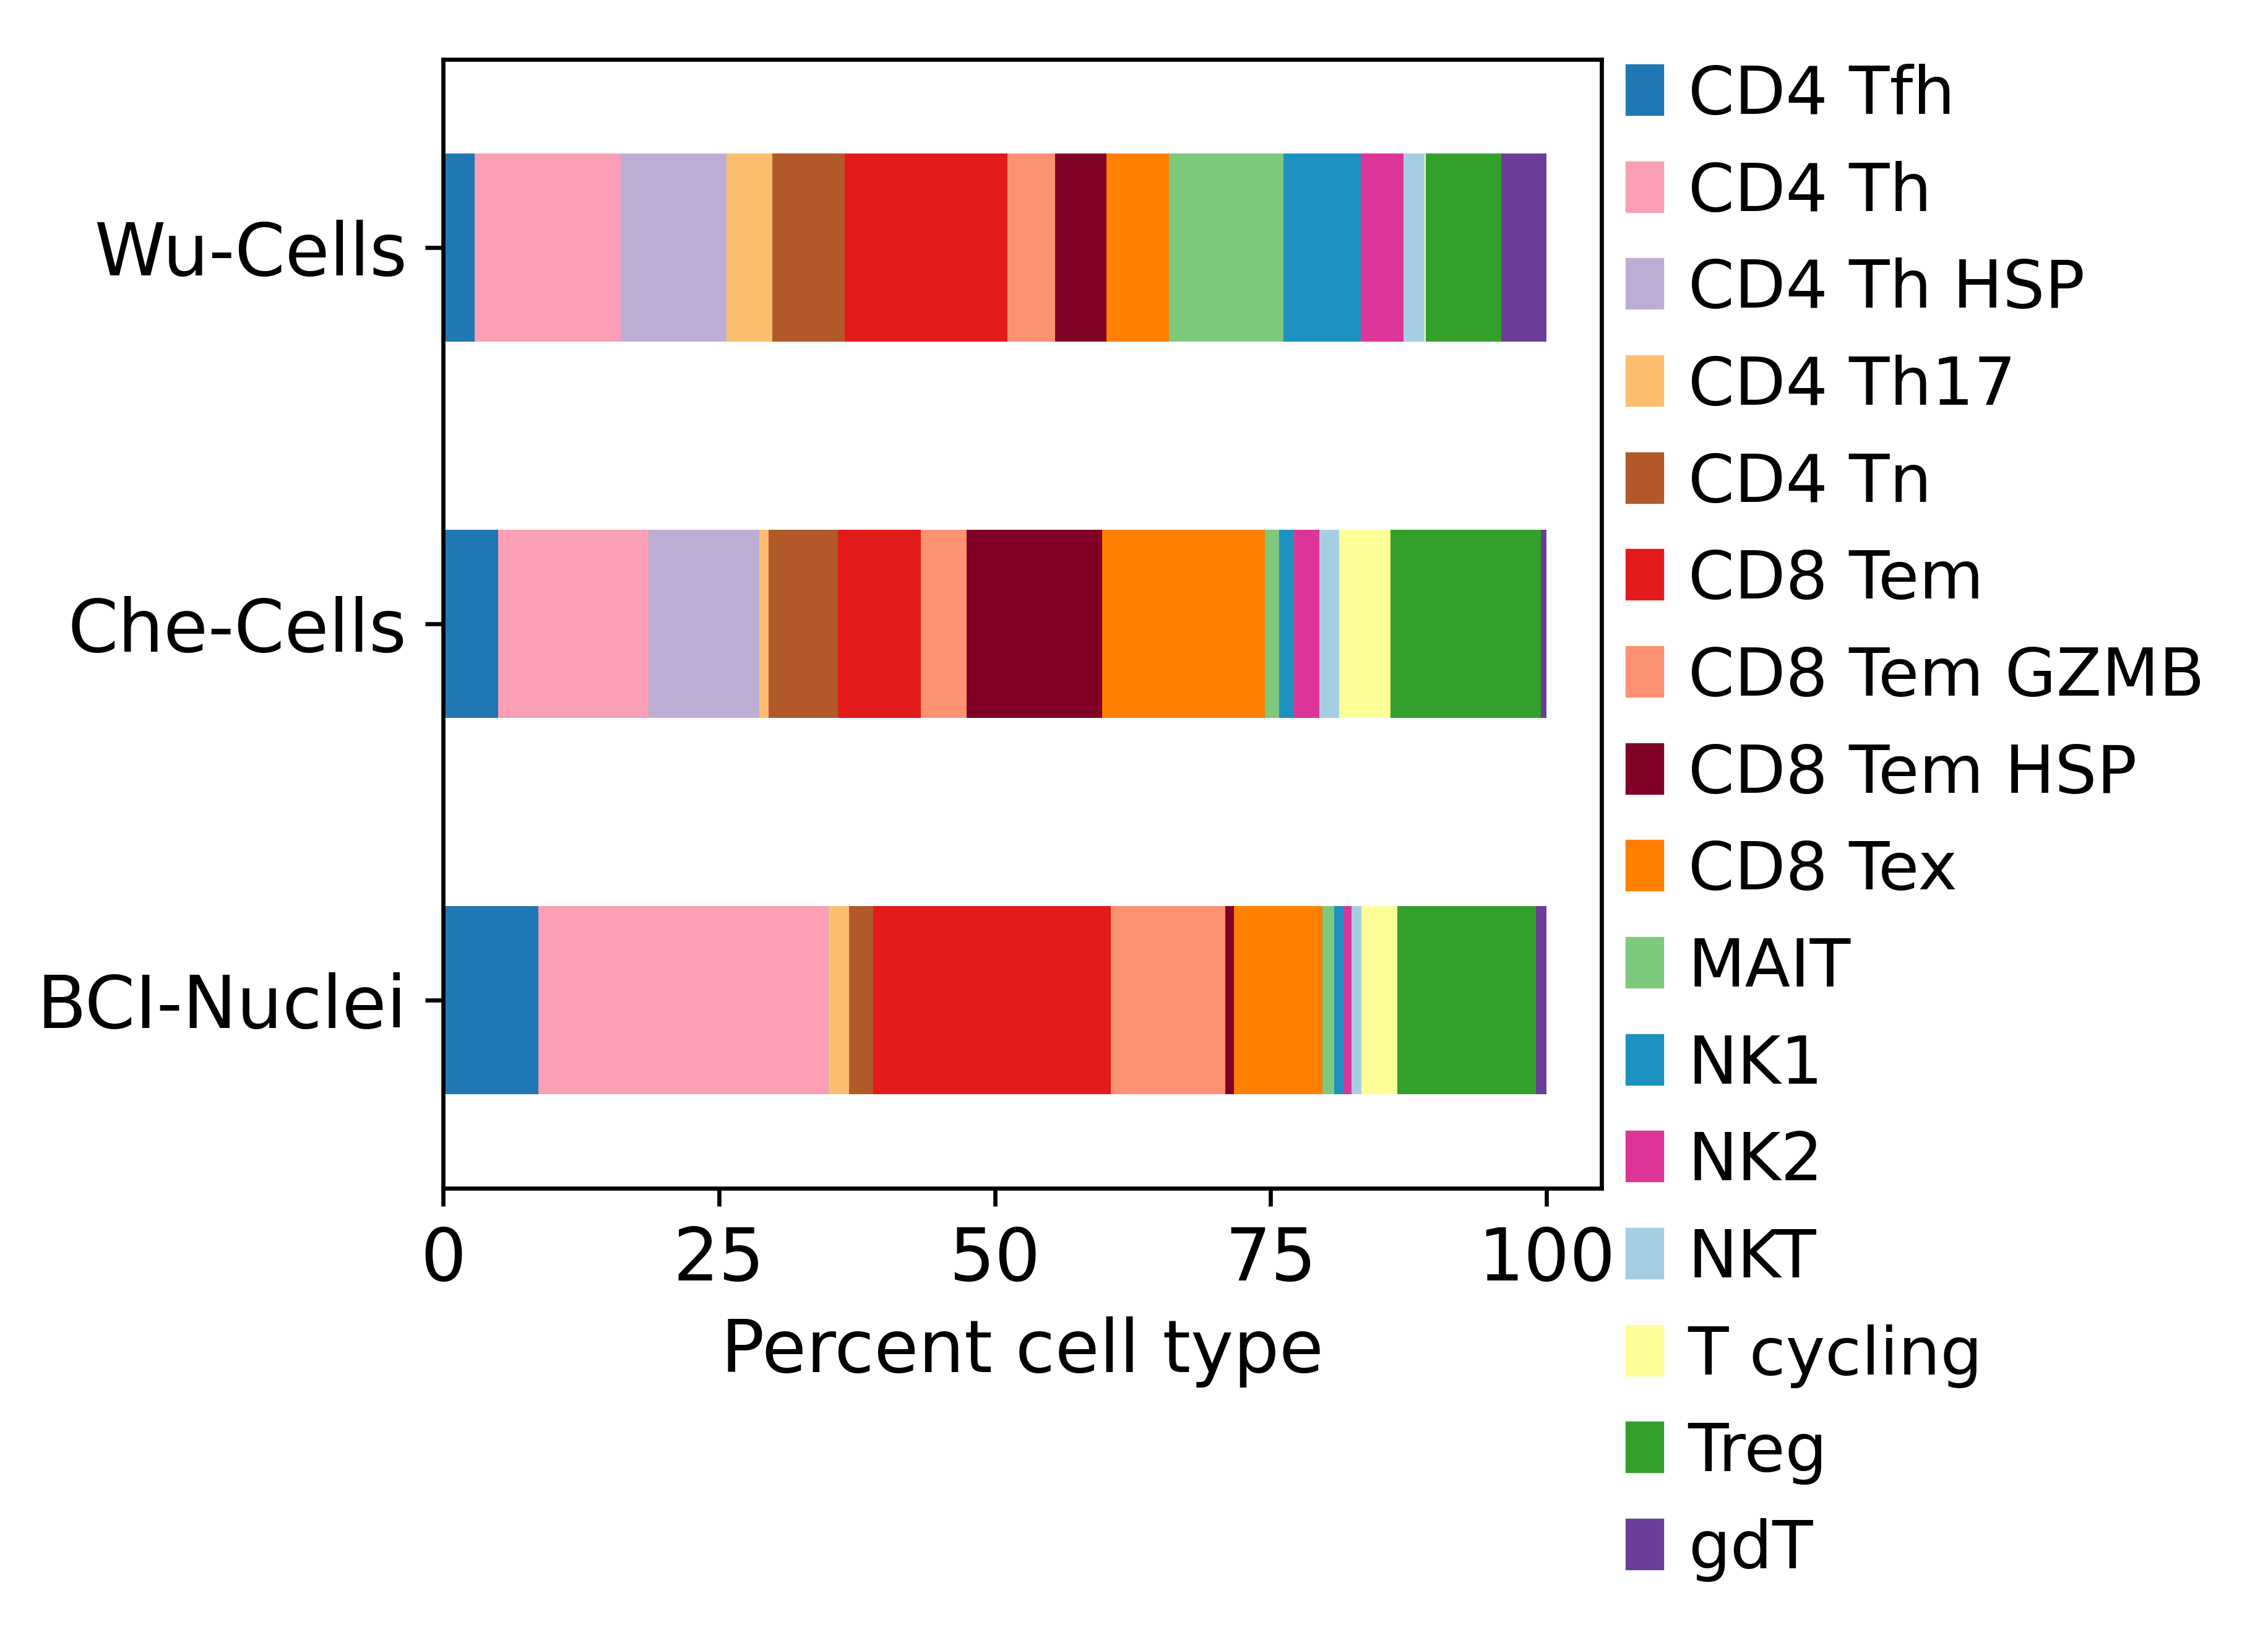

In [9]:
from collections import OrderedDict

color_dict = OrderedDict(
    zip(
        adata.obs["Annotation_scVI_detailed"].cat.categories.values.tolist(),
        adata.uns["Annotation_scVI_detailed_colors"],
    )
)

proportion_cells_patient(
    adata.obs,
    groupby_labels=["cell_source", "Annotation_scVI_detailed"],
    xlabel="Percent cell type",
    ylabel="",
    colors=color_dict,
    bbox_to_anchor=(1,1.02),
    figname="barplot_annotation_across_cell_source.pdf",
)

In [10]:
# todo dotplot with all cell types annotated
markers = {
    "T": ["CD3E"],
    "CD4": ["CD4"],
    "Th": ["IL7R", "CD40LG", "ANXA1"],
    "Tfh": ["ITM2A", "LPAR6", "PDCD1"],
    "Naïve CD4 T": ["CCR7", "SELL", "TCF7", "LEF1"],
    "Th17": ["IL17A", "ODF2L", "IL7R", "PDE4D"],
    "Treg": ["FOXP3", "CTLA4", "IL2RA"],
    "CD8": ["CD8A", "CD8B"],
    "Exhausted T": [
        "PDCD1",
        "LAG3",
        "HAVCR2",
        "CTLA4",
        "TIGIT",
        "ENTPD1",
    ],  # PD1: PCDC1, TIM3: HAVCR2,  CD39:ENTPD1 https://www.nature.com/articles/s41467-021-23324-4
    "Effector memory CD8": ["CCL4", "CCL5", "GZMK", "GZMB"],
    "gdT": ["TRDC", "TRGC1", "KLRC2"], # KLRC2, TRDC, TRGC1, TRGC2],
    "NKT": ["GZMA", "NKG7", "FGFBP2", "CD3G"],
    "MAIT": ["SLC4A10", "NCR3", "KLRB1"],
    "NK": ["NCAM1", "FCER1G", "KLRC1"],
    "NK1": ["CD7", "KRT81", "KRT86", "XCL1", "XCL2", "GZMK", "CD160", "KLRB1", "CD27",],  # dNK2
    "NK2": ["GNLY", "GZMB", "GZMH", "KIR2DL1", "PRF1", "KIR3DL2", "HAVCR2"],  # dNK1
    #"ILC": ["AREG", "TLE1", "IL4I1"],
    #"ILC3": ["IL4I1", "RORC", "TNFRSF25", "SPINK2", "KLRB1", "IL7R"],
    "Cycling": ["MKI67"],
}

In [11]:
adata.obs.Annotation_scVI_detailed.cat.categories

Index(['CD4 Tfh', 'CD4 Th', 'CD4 Th HSP', 'CD4 Th17', 'CD4 Tn', 'CD8 Tem',
       'CD8 Tem GZMB', 'CD8 Tem HSP', 'CD8 Tex', 'MAIT', 'NK1', 'NK2', 'NKT',
       'T cycling', 'Treg', 'gdT'],
      dtype='object')

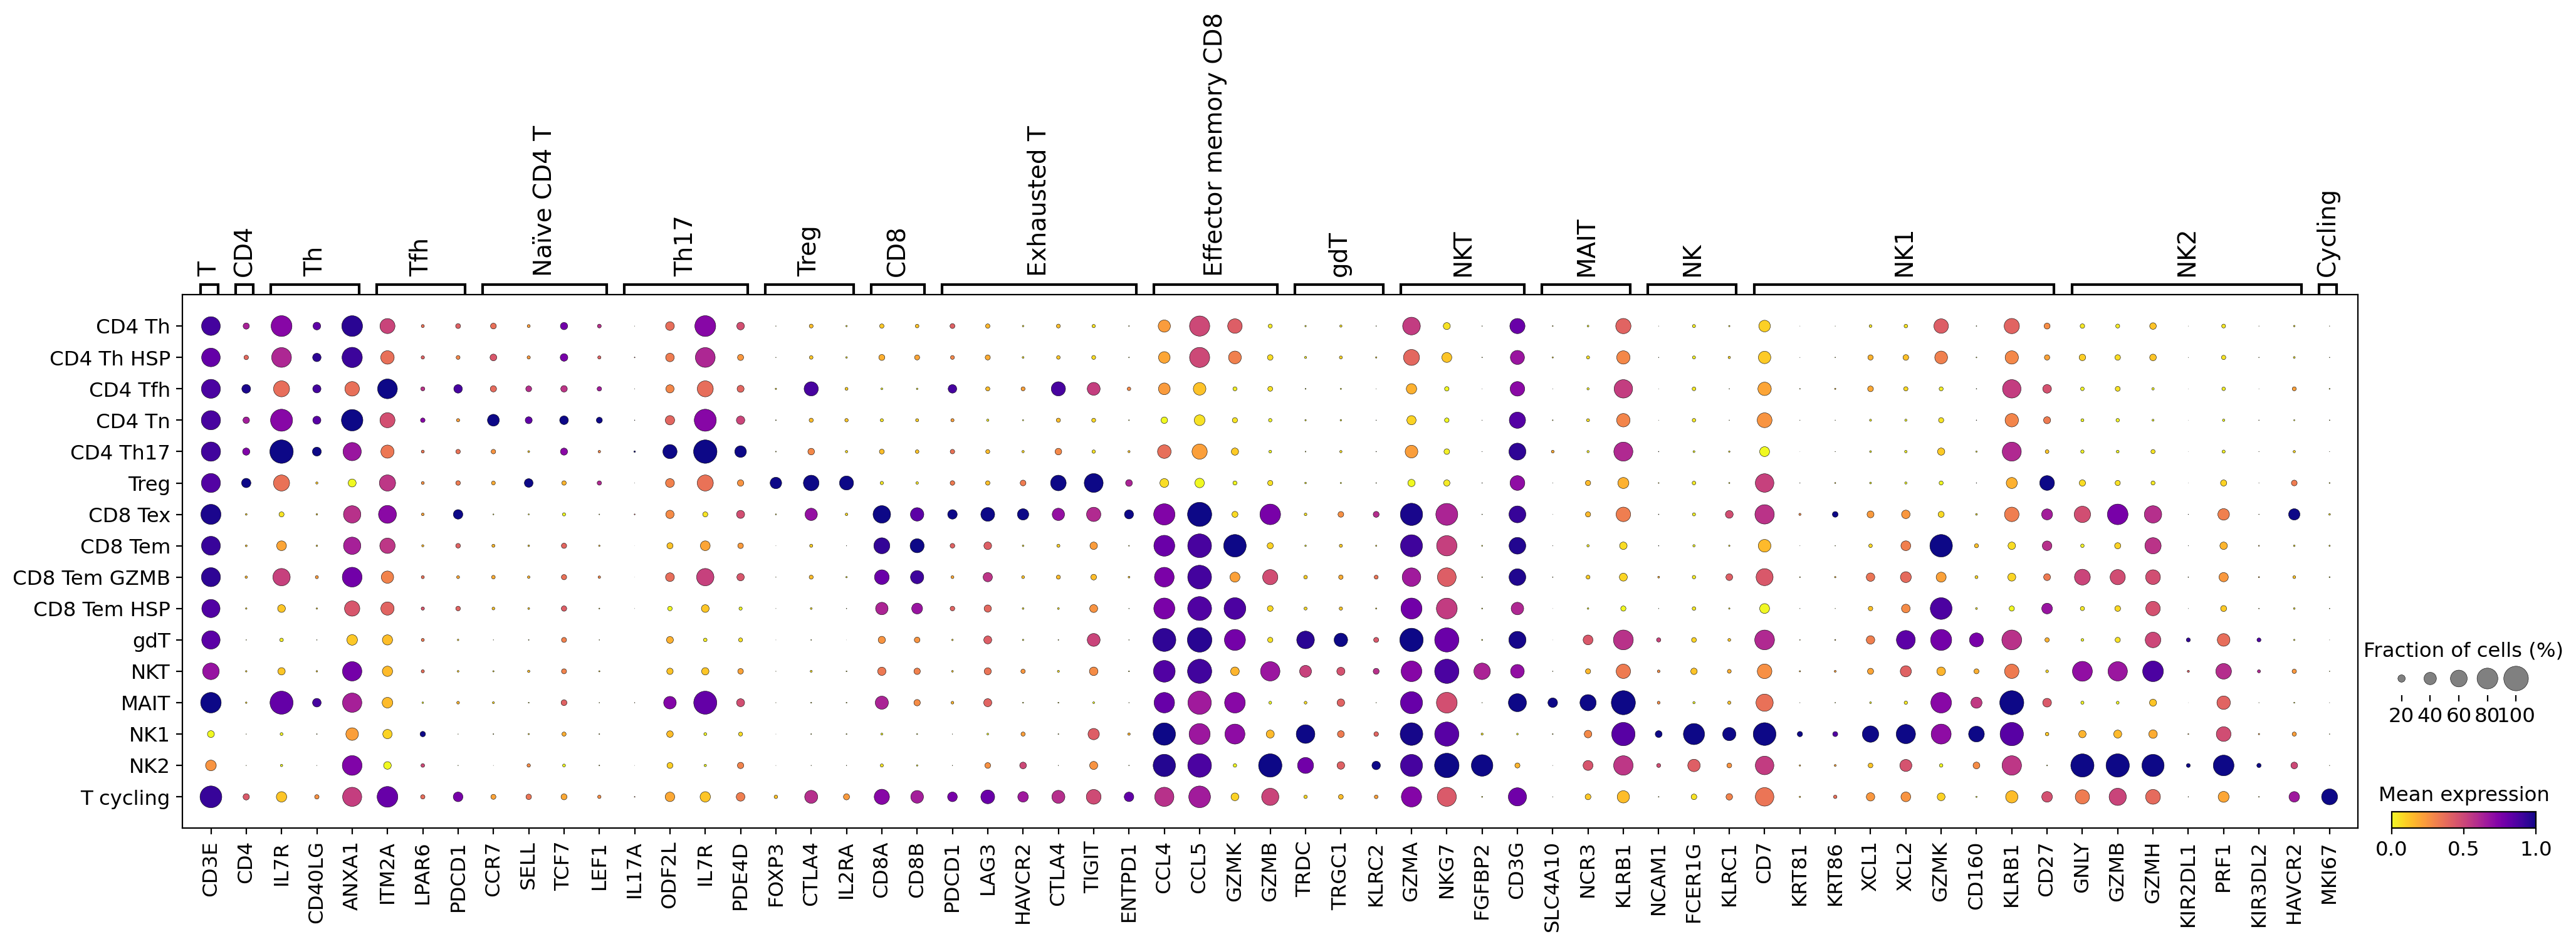

In [12]:
sc.pl.dotplot(
    adata,
    groupby="Annotation_scVI_detailed",
    use_raw=True,
    var_names=markers,
    categories_order = [
        "CD4 Th",
        "CD4 Th HSP",
        "CD4 Tfh",
        "CD4 Tn",
        "CD4 Th17",
        "Treg",
        "CD8 Tex",
        "CD8 Tem",
        "CD8 Tem GZMB",
        "CD8 Tem HSP",
        "gdT",
        "NKT",
        "MAIT",
        "NK1",
        "NK2",
        "T cycling"
    ],
    
    cmap="plasma_r",
    standard_scale="var",
    vmin=0,
    vmax=1,
    colorbar_title="Mean expression",
    size_title = "Fraction of cells (%)",
    dendrogram=False,
    save="TNKILC_dotplot_mean_general_annotations.pdf",
    show=True,
)

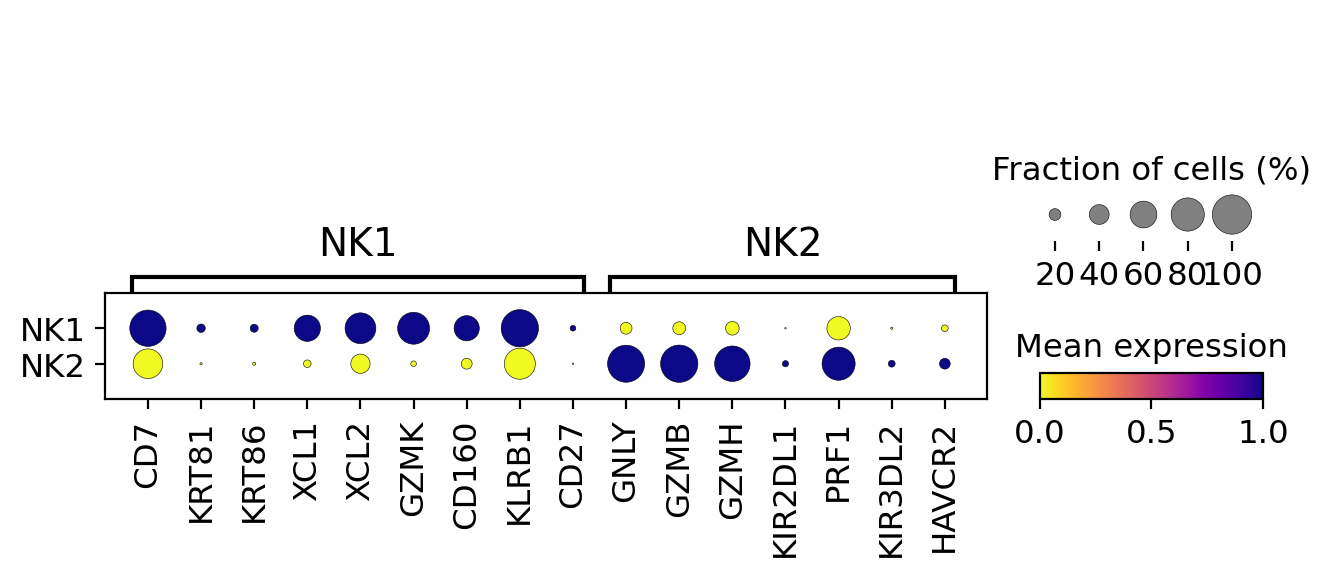

In [13]:
markers_nk_selected = {
    "NK1": [
        "CD7",
        "KRT81",
        "KRT86",
        "XCL1",
        "XCL2",
        "GZMK",
        "CD160",
        "KLRB1",
        "CD27",
    ],  # dNK2
    "NK2": ["GNLY", "GZMB", "GZMH", "KIR2DL1", "PRF1", "KIR3DL2", "HAVCR2"],  # dNK1
}

sc.pl.dotplot(
    adata[
        adata.obs.Annotation_scVI_detailed.str.contains("NK1|NK2")
    ],  # only NK cluster, to plot NK cell clusters only 
    groupby="Annotation_scVI_detailed",
    use_raw=True,
    var_names=markers_nk_selected,  # plot NK cell clusters only
    cmap="plasma_r",
    standard_scale="var",
    vmin=0,
    vmax=1,
    colorbar_title="Mean expression",
    size_title = "Fraction of cells (%)",
    dendrogram=False,
    save="NK_dotplot_mean_selected_markers.pdf",
    show=True,
)

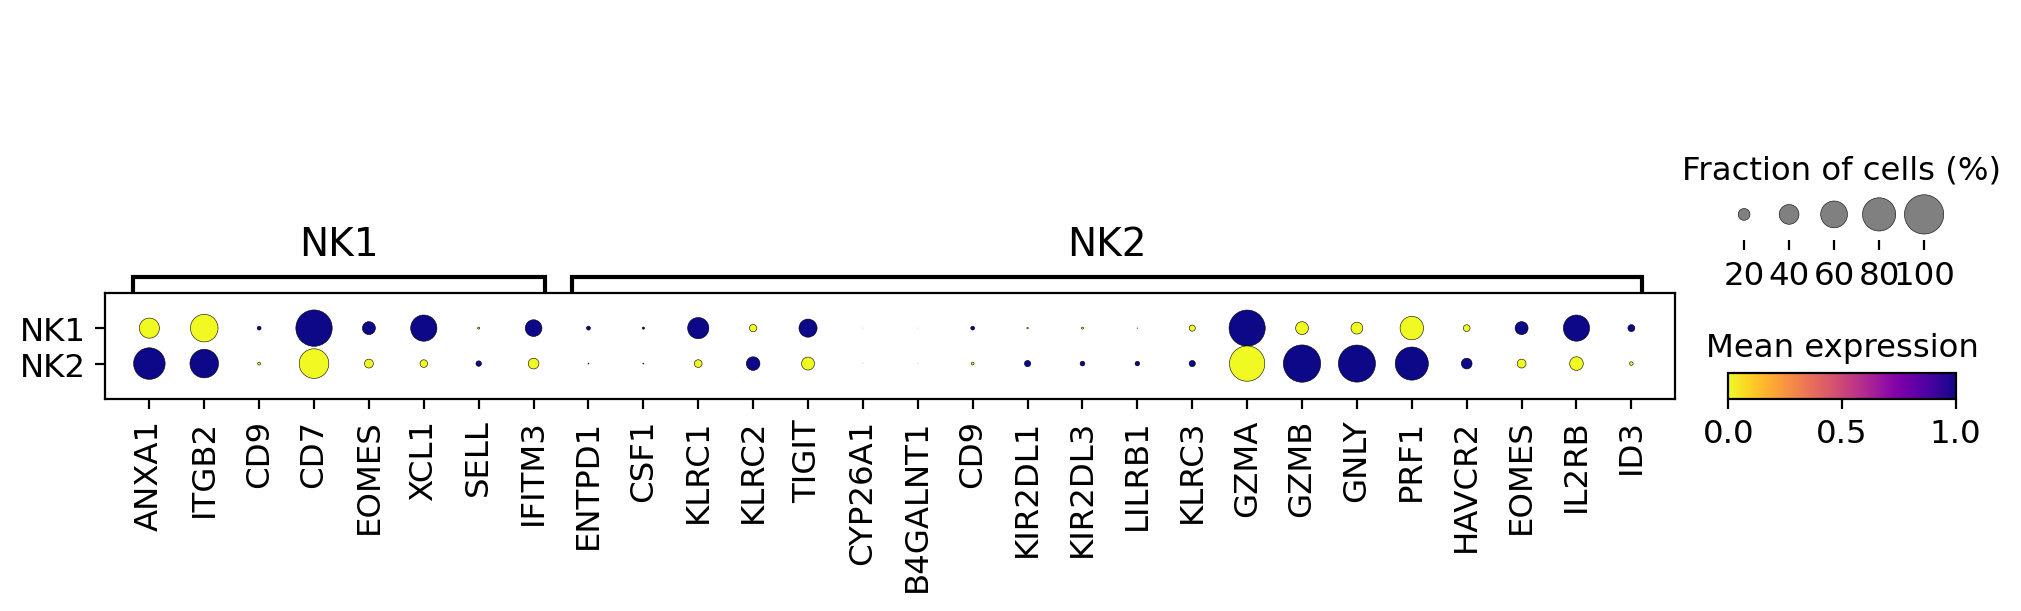

In [14]:
markers_nk = {
    "NK1": ["ANXA1", "ITGB2", "CD9", "CD7", "EOMES", "XCL1", "SELL", "IFITM3"],  # dNK2
    "NK2": [
        "ENTPD1",
        "CSF1",
        "KLRC1",
        "KLRC2",
        "TIGIT",
        "CYP26A1",
        "B4GALNT1",
        "CD9",
        "KIR2DL1",
        "KIR2DL3",
        "LILRB1",
        "KLRC3",
        "GZMA",
        "GZMB",
        "GNLY",
        "PRF1",
        "HAVCR2",
        "EOMES",
        "IL2RB",
        "ID3",
    ],  # dNK1
}

sc.pl.dotplot(
    adata[
        adata.obs.Annotation_scVI_detailed.str.contains("NK1|NK2")
    ],  # only NK cluster, to plot NK cell clusters only 
    groupby="Annotation_scVI_detailed",
    use_raw=True,
    var_names=markers_nk,  # plot NK cell clusters only
    cmap="plasma_r",
    standard_scale="var",
    vmin=0,
    vmax=1,
    colorbar_title="Mean expression",
    size_title = "Fraction of cells (%)",
    dendrogram=False,
    save="NK_dotplot_mean_all_markers.pdf",
    show=True,
)

### zscore

In [15]:
adata_zscore = adata.raw.to_adata().copy()
# scale and store results in layer for later plotting
adata_zscore.layers['scaled'] = sc.pp.scale(adata_zscore, copy=True).X
adata_zscore.obs=adata.obs

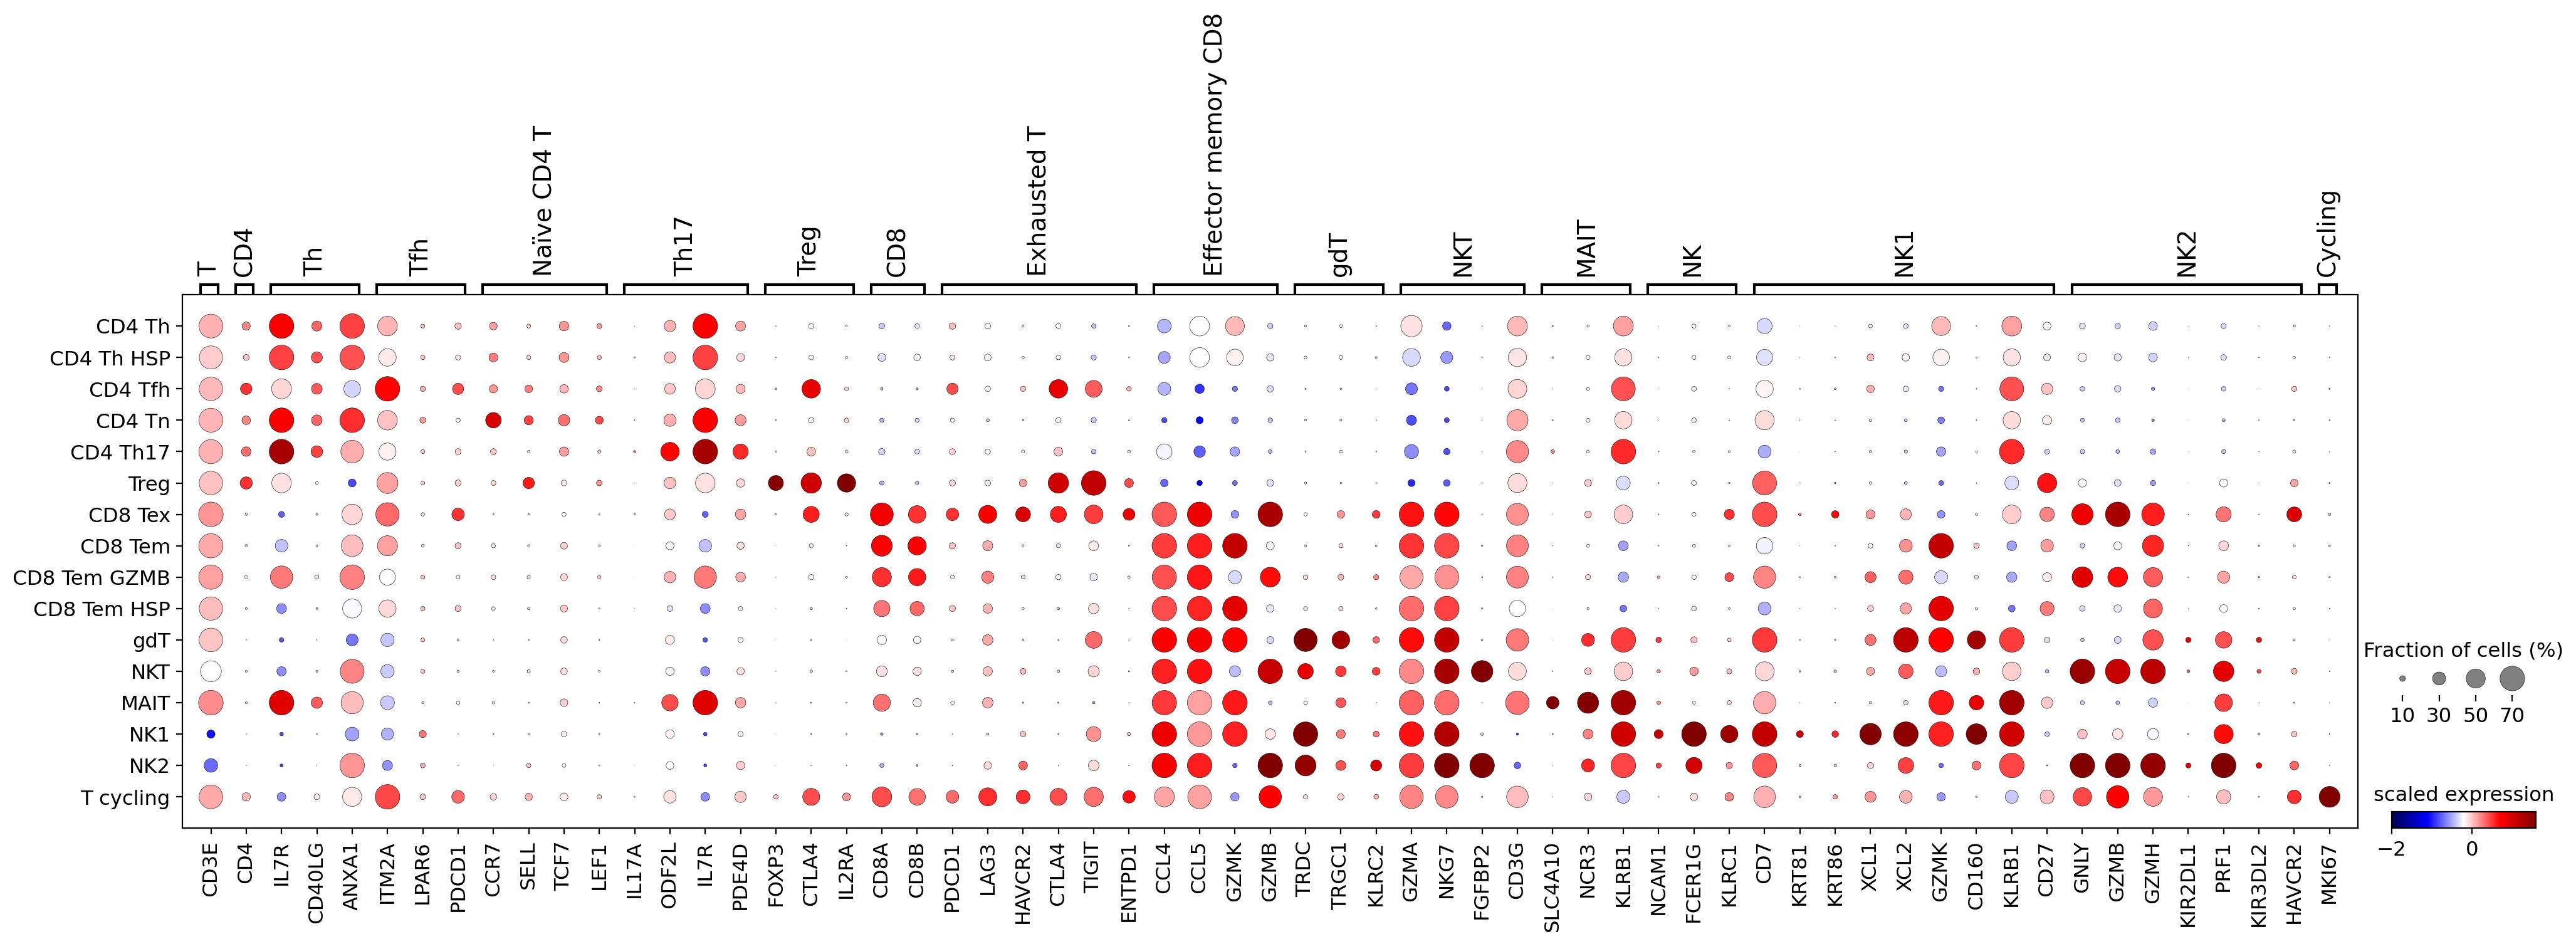

In [16]:
sc.pl.dotplot(adata=adata_zscore, 
              var_names=markers,
                  categories_order = ["CD4 Th",
        "CD4 Th HSP",
        "CD4 Tfh",
        "CD4 Tn",
        "CD4 Th17",
        "Treg",
        "CD8 Tex",
        "CD8 Tem",
        "CD8 Tem GZMB",
        "CD8 Tem HSP",
        "gdT",
        "NKT",
        "MAIT",
        "NK1",
        "NK2",
        "T cycling"
    ],
              groupby="Annotation_scVI_detailed",
              cmap="seismic", 
              layer="scaled", 
              vmin=-2,
              vmax=1.6, 
              dot_max=0.7, 
              colorbar_title = "scaled expression", 
              size_title="Fraction of cells (%)",
              save='zscore_general.pdf')

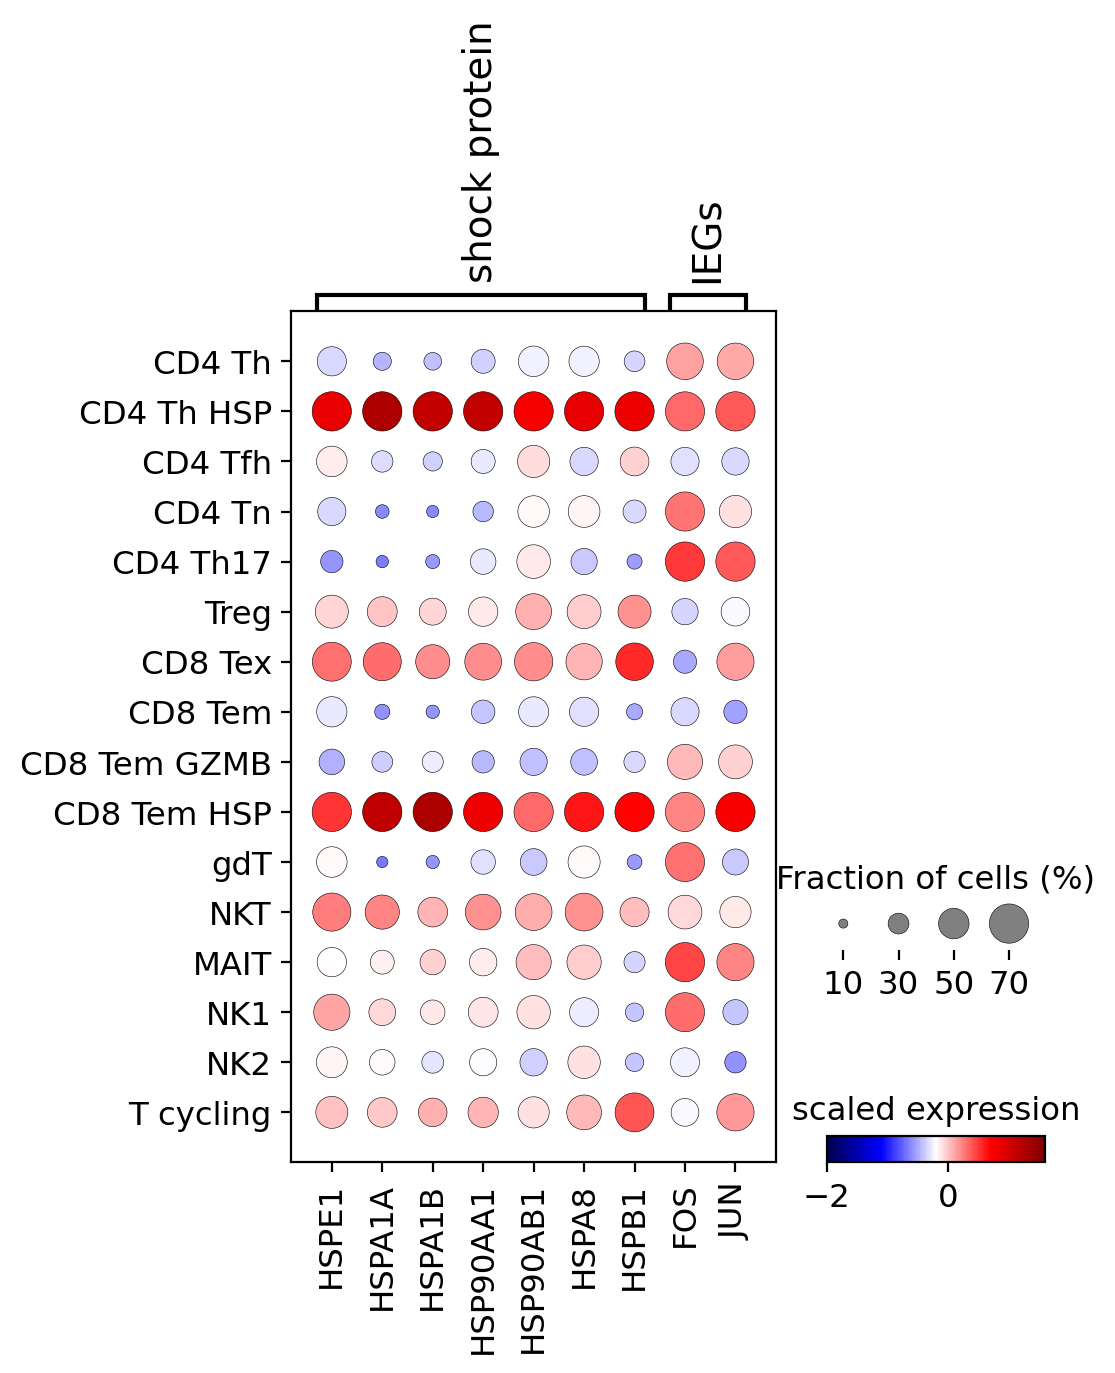

In [18]:
dissocation_markers_dict = {
    "shock protein": [
        "HSPE1",
        "HSPA1A",
        "HSPA1B",
        "HSP90AA1",
        "HSP90AB1",
        "HSPA8",
        "HSPB1",
    ],
    "IEGs": ["FOS", "JUN"],
}

sc.pl.dotplot(adata=adata_zscore, 
              var_names=dissocation_markers_dict,
                  categories_order = ["CD4 Th",
        "CD4 Th HSP",
        "CD4 Tfh",
        "CD4 Tn",
        "CD4 Th17",
        "Treg",
        "CD8 Tex",
        "CD8 Tem",
        "CD8 Tem GZMB",
        "CD8 Tem HSP",
        "gdT",
        "NKT",
        "MAIT",
        "NK1",
        "NK2",
        "T cycling"
    ],
              groupby="Annotation_scVI_detailed",
              cmap="seismic", 
              layer="scaled", 
              vmin=-2,
              vmax=1.6, 
              dot_max=0.7, 
              colorbar_title = "scaled expression", 
              size_title="Fraction of cells (%)",
              save='zscore_general_HSP.pdf')

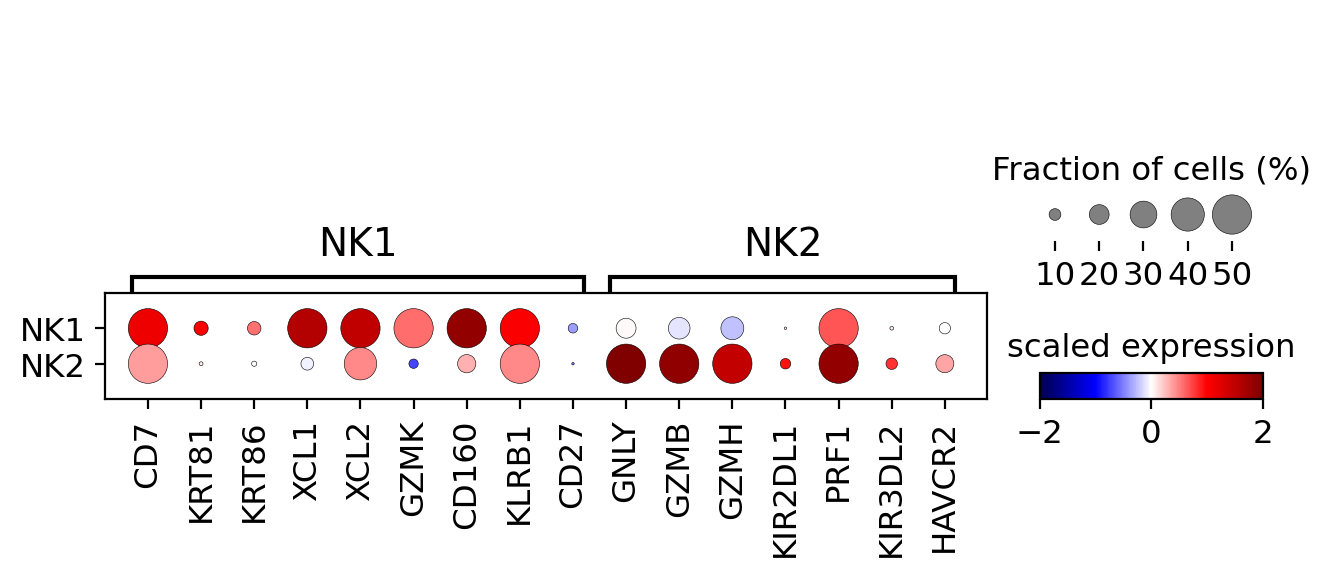

In [26]:
sc.pl.dotplot(
    adata_zscore[
        adata_zscore.obs.Annotation_scVI_detailed.str.contains("NK1|NK2")
    ],  # only NK cluster, to plot NK cell clusters only 
    groupby="Annotation_scVI_detailed",
    var_names=markers_nk_selected,  # plot NK cell clusters only markers_nk_selected
   cmap="seismic", 
              layer="scaled", 
              vmin=-2,
              vmax=2, 
              dot_max=0.5, 
              colorbar_title = "scaled expression", 
              size_title="Fraction of cells (%)",
    dendrogram=False,
    save="NK_dotplot_zscore.pdf",
    show=True,
)

paper mirjana saw: if we also have those EOMES CD4 T cells?
https://www.cell.com/cancer-cell/fulltext/S1535-6108(23)00347-1

[<AxesSubplot:title={'center':'T-NK-ILC mCRC'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot:title={'center':'EOMES'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot:title={'center':'LAG3'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot:title={'center':'IL10'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot:title={'center':'CTLA4'}, xlabel='UMAP1', ylabel='UMAP2'>]

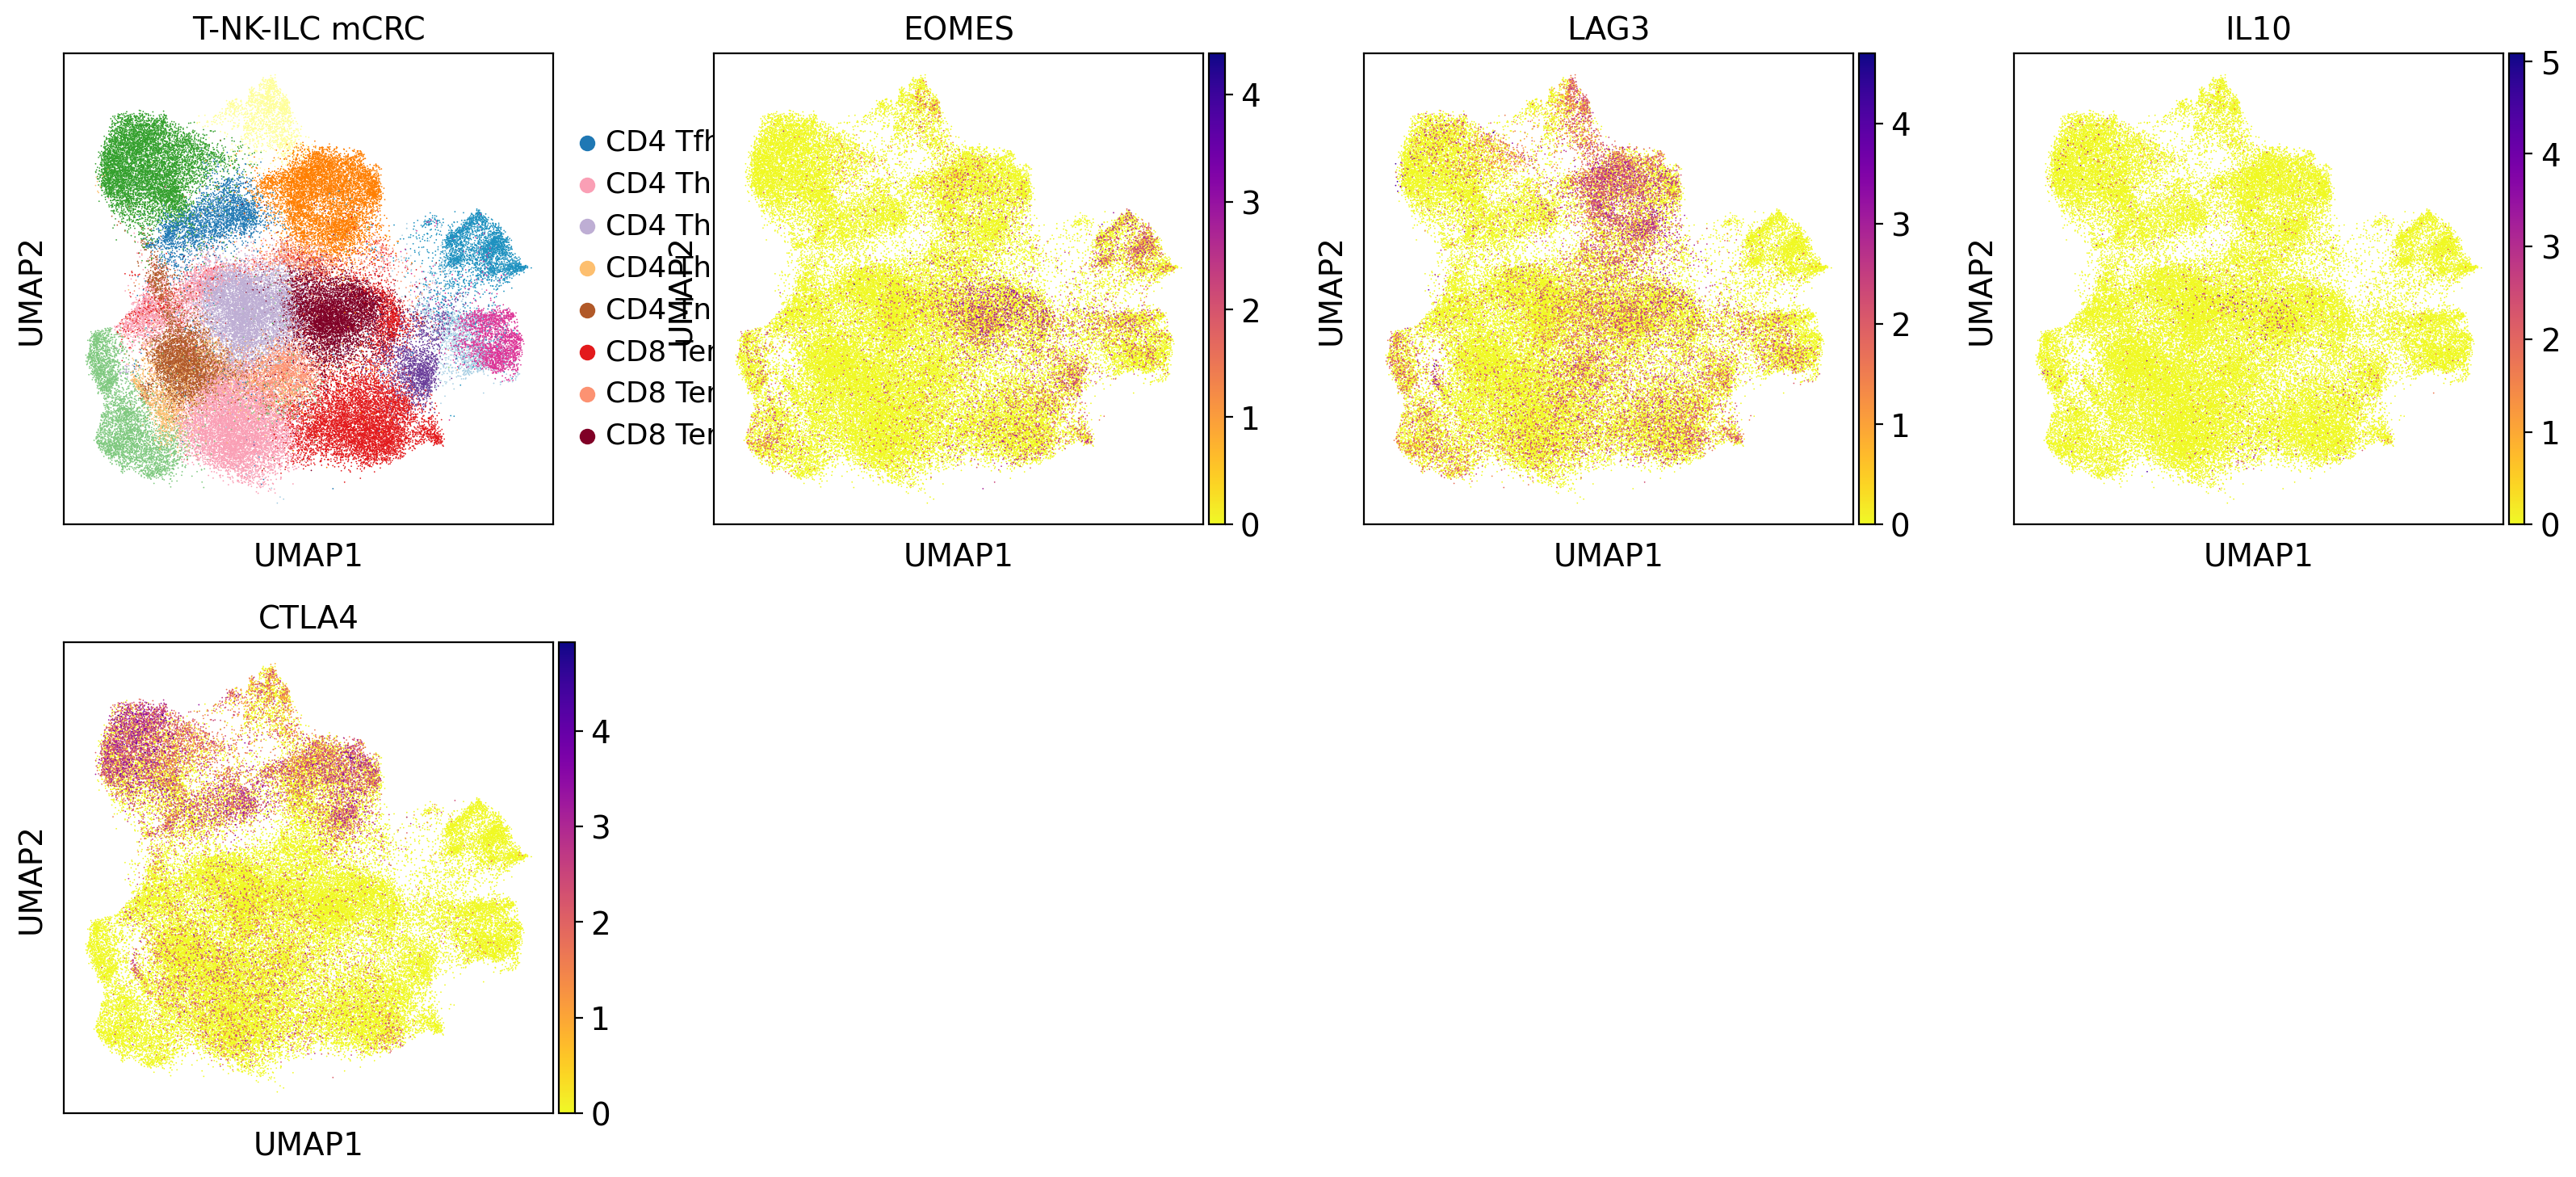

In [27]:
genes2plot4me = ["EOMES", "LAG3", "IL10", "CTLA4"]

sc.pl.umap(
    adata,
    color=["Annotation_scVI_detailed"] + genes2plot4me,
    show=False,
    legend_loc="right margin",
    title="T-NK-ILC mCRC",
    use_raw=True,
    cmap="plasma_r"
)

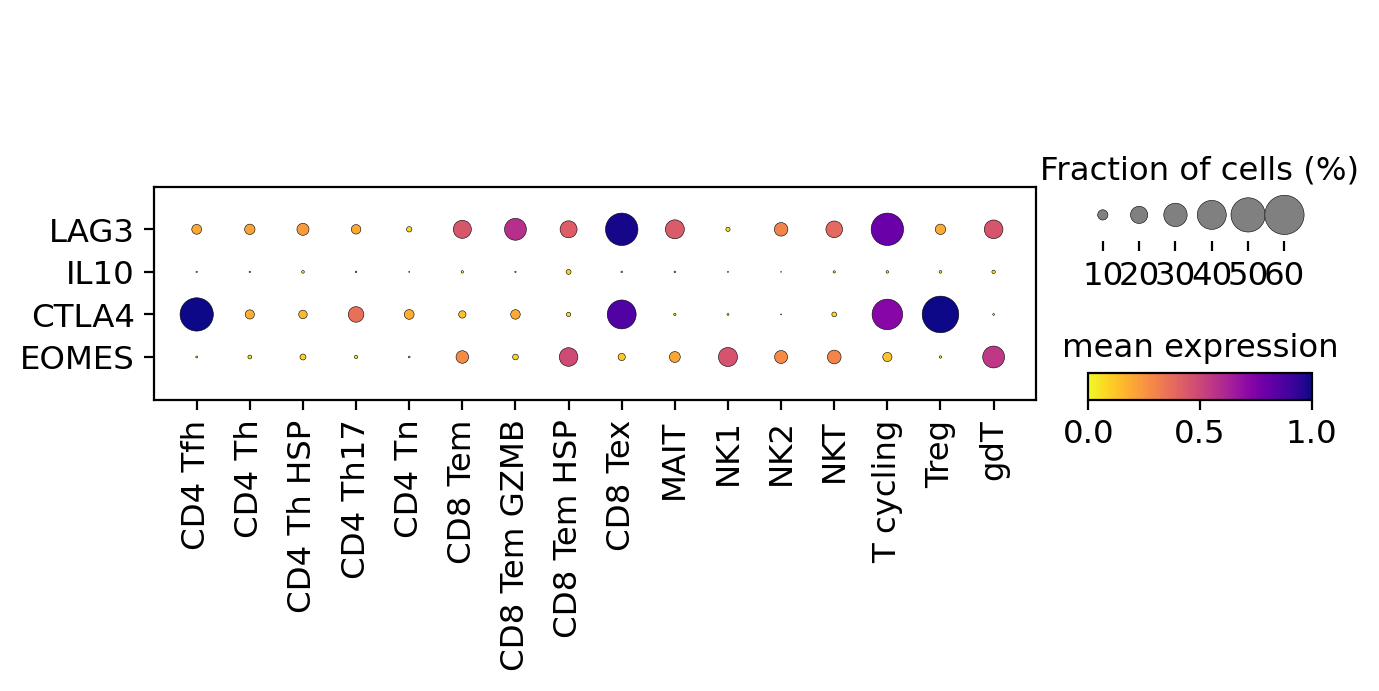

In [28]:
sc.pl.dotplot(adata,
              var_names=["LAG3", "IL10", "CTLA4", "EOMES"],
              groupby="Annotation_scVI_detailed",
              cmap="plasma_r", 
              vmin=0,
              vmax=1, 
              use_raw=True,
              #standard_scale="var",
              #dot_max=0.5, 
              colorbar_title = "mean expression", 
              size_title="Fraction of cells (%)",
              swap_axes=True
              #save=f'{gene_sign}_{receiver}_zscore_cancercells_receptors_pre-filtering.pdf'
             )